# Simple Linear Regression


    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
#### To download the data, FuelConsumption.csv under week 6 secton of Moudle

## Understanding the Data

### `FuelConsumption.csv`:
Fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [2]:
#Reading the data using read_csv

df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Let's first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.

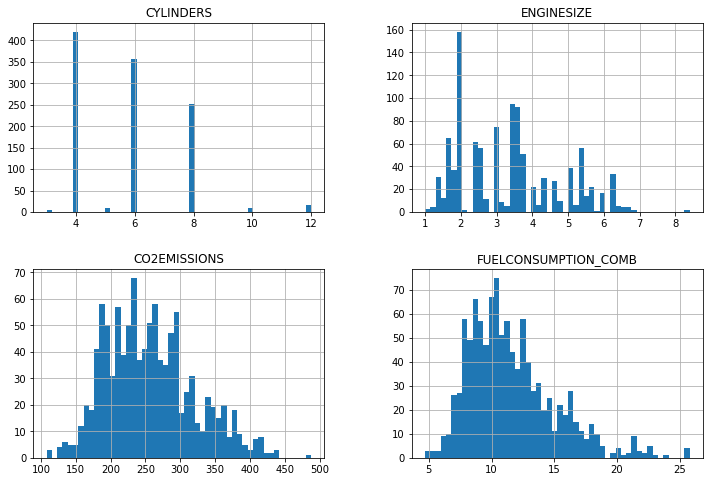

In [4]:
import matplotlib.pyplot as plt

# Selecting the specific columns for visualization
viz = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

# Creating histograms
viz.hist(bins=50, figsize=(12, 8))

# Displaying the plots
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


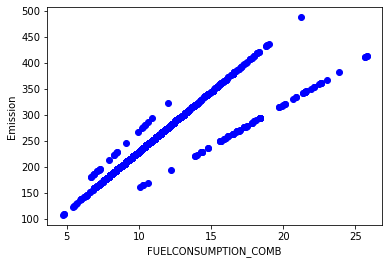

In [5]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

* The scatter plot has been created, illustrating the relationship between 'FUELCONSUMPTION_COMB' and 'CO2EMISSIONS' from the -*   dataset. 
* Each point represents a vehicle, with its combined fuel consumption on the x-axis and its CO2 emissions on the  
* y-axis. This visualization can help in understanding how these two variables are related. 

## Creating a scatter plot for engine size vs CO2 emissions

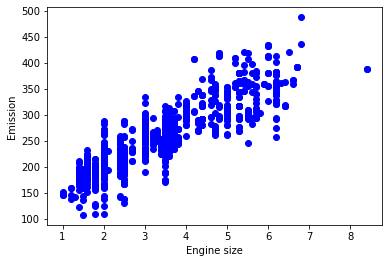

In [6]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:

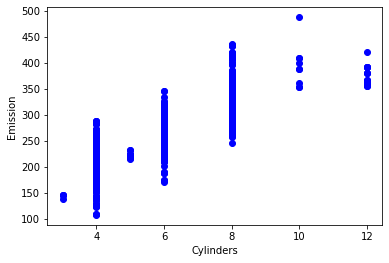

In [7]:
# Creating a scatter plot for the number of cylinders vs CO2 emissions
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

# Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Selecting 'ENGINESIZE' as predictor and 'CO2EMISSIONS' as the response variable
X = df[['ENGINESIZE']]
y = df['CO2EMISSIONS']



In [10]:
print(X.head())



   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


In [11]:
print(y.head())

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64


In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape

(853, 1)

In [14]:
X_test.shape

(214, 1)

In [15]:
y_train.shape

(853,)

In [16]:
y_test.shape

(214,)

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

# The coefficients
print ('Coefficienmts: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [18]:
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [39.24838431]
Intercept:  126.18920154724933


* The regression equation, based on the linear regression model we developed with 'ENGINESIZE' as the predictor for 'CO2EMISSIONS', is as follows:

* CO2EMISSIONS = 39.25 × ENGINESIZE + 126.19
* CO2EMISSIONS=39.25×ENGINESIZE+126.19

-- In this equation:

* ENGINESIZE
- ENGINESIZE is the predictor variable (independent variable).
- The coefficient 
- 39.25
- 39.25 represents the estimated increase in CO2 emissions for each one-unit increase in engine size.
* The intercept 
- 126.19
- 126.19 represents the estimated CO2 emissions when the engine size is zero.
- This equation can be used to predict CO2 emissions based on the engine size of a vehicle

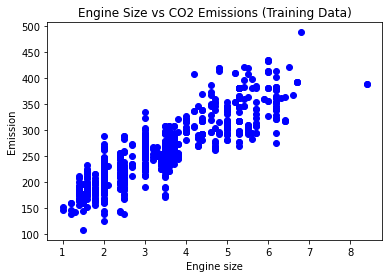

In [19]:
# Creating a scatter plot for Engine Size vs CO2 Emissions in the training data
plt.scatter(X_train['ENGINESIZE'], y_train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Engine Size vs CO2 Emissions (Training Data)")
plt.show()


- The blue points represent the training data, illustrating the relationship between engine size and CO2 emissions.
- The red line is the regression line, representing the model's predictions based on the linear relationship between engine size - and CO2 emissions.
- This visualization helps in understanding how well the linear model fits the training data

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting on the training set
train_pred = model.predict(X_train)

In [21]:
# Predicting on the test set
test_pred = model.predict(X_test)


In [22]:
# Evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, train_pred)
mse_train = mean_squared_error(y_train, train_pred)
r2_train = r2_score(y_train, train_pred)

In [23]:
# Evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, test_pred)
mse_test = mean_squared_error(y_test, test_pred)
r2_test = r2_score(y_test, test_pred)


evaluation_metrics = {
    "Training Set": {
        "Mean Absolute Error (MAE)": mae_train,
        "Mean Squared Error (MSE)": mse_train,
        "R-squared": r2_train
    },
    "Test Set": {
        "Mean Absolute Error (MAE)": mae_test,
        "Mean Squared Error (MSE)": mse_test,
        "R-squared": r2_test
    }
}

evaluation_metrics


{'Training Set': {'Mean Absolute Error (MAE)': 22.88779912887283,
  'Mean Squared Error (MSE)': 889.4468284071899,
  'R-squared': 0.7748585292765848},
 'Test Set': {'Mean Absolute Error (MAE)': 25.56889045602356,
  'Mean Squared Error (MSE)': 1181.528809303555,
  'R-squared': 0.7201153918073576}}

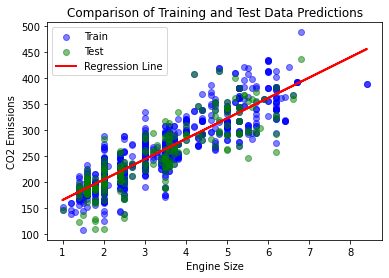

In [24]:
# Adjusting the code to avoid InvalidIndexError

# Scatter plot for training data
plt.scatter(X_train['ENGINESIZE'], y_train, color='blue', alpha=0.5, label='Train')

# Scatter plot for test data
plt.scatter(X_test['ENGINESIZE'], y_test, color='green', alpha=0.5, label='Test')

# Regression line based on the training data predictions
plt.plot(X_train['ENGINESIZE'], train_pred, color='red', linewidth=2, label='Regression Line')

# Adding labels and legend
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.title("Comparison of Training and Test Data Predictions")
plt.show()


#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of the regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits the data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


 # Exercise

-- Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

 -- Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` -- as the test_x data from the `test` dataframe
